In [1]:
%load_ext autoreload
%autoreload 2

import cv2
import numpy as np
import PIL
from scipy.ndimage import gaussian_filter

from pathlib import Path
import sys
sys.path.append(str(Path(__session__).parent.parent))

In [2]:
from utils import *
from detect import *

In [30]:
db = SalamandraDB(load_images=True)

In [31]:
salamandra0 = db.content['0']
salamandra1 = db.content['1']

In [32]:
viz0 = overlay_spot_masks_with_distance_red(salamandra0.body.detection.image, salamandra0.spots, show_numbers=True)
viz1 = overlay_spot_masks_with_distance_red(salamandra1.body.detection.image, salamandra1.spots, show_numbers=True)

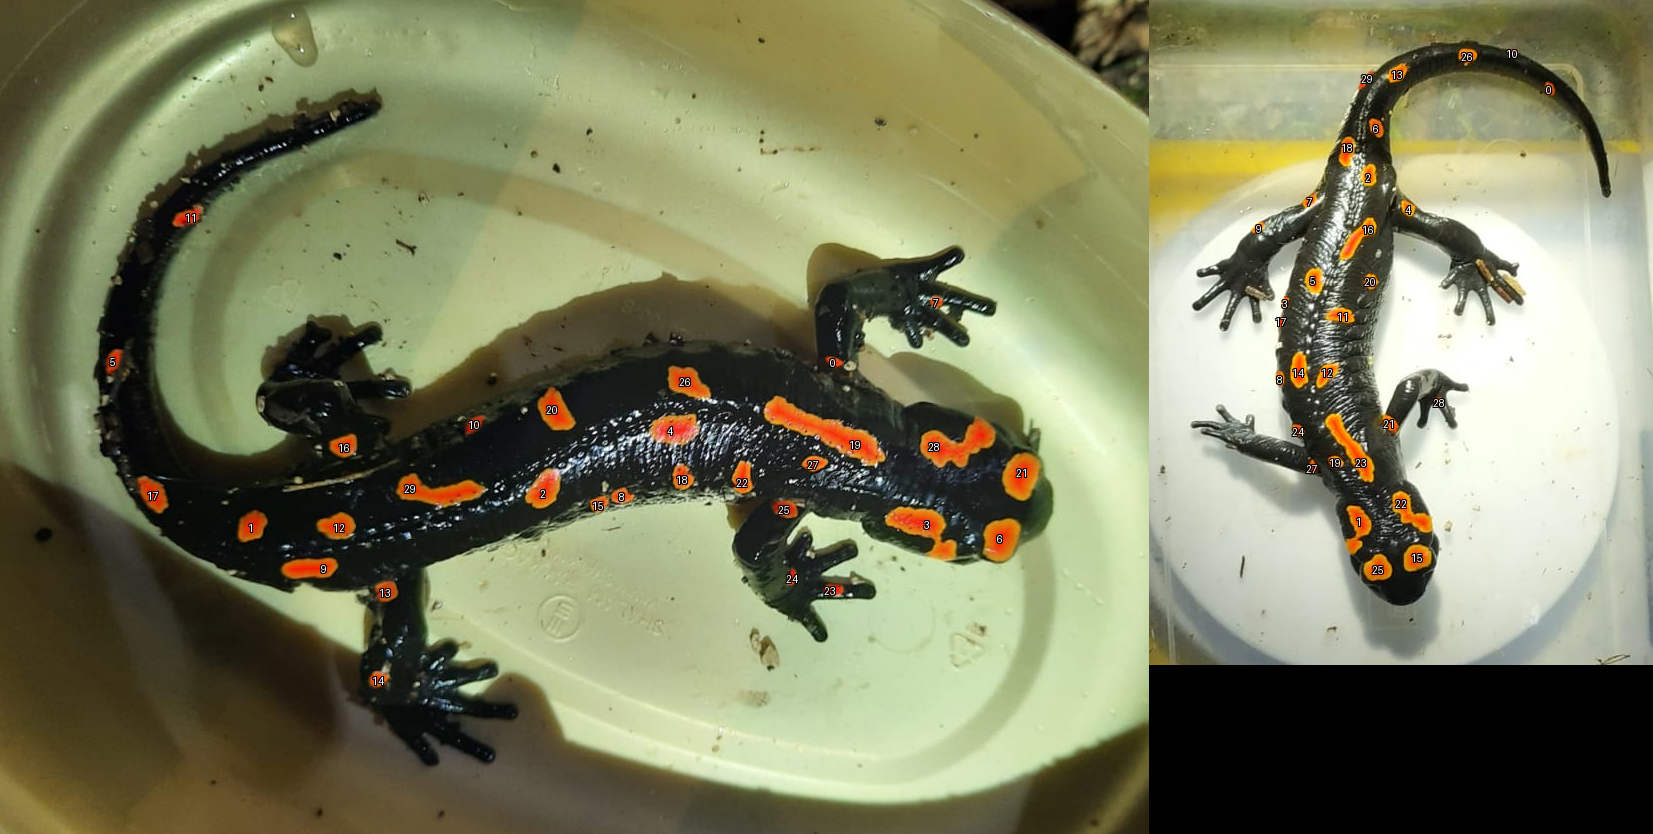

In [33]:
concat_images_side_by_side(viz0, viz1)

In [34]:
results = [match_detections(spot0, spot1) for spot0, spot1 in zip(salamandra0.spots, salamandra0.spots]

In [35]:
results

[[],
 [],
 [< cv2.DMatch 0x754a8bbe1ef0>],
 [< cv2.DMatch 0x754a8b820110>,
  < cv2.DMatch 0x754a8b8223b0>,
  < cv2.DMatch 0x754a8b821c90>],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [< cv2.DMatch 0x754a884de0f0>, < cv2.DMatch 0x754a8b821d50>],
 [< cv2.DMatch 0x754a8bbe1ed0>],
 [],
 [],
 [],
 [],
 [],
 [],
 [< cv2.DMatch 0x754a8b820390>],
 [],
 [],
 [< cv2.DMatch 0x754a8b820410>],
 [],
 [],
 [],
 [],
 [],
 [< cv2.DMatch 0x754a8b8200f0>],
 [< cv2.DMatch 0x754a8b822370>]]

0

In [36]:
match_detections(salamandra0.body, salamandra1.body)

[< cv2.DMatch 0x754a88500730>,
 < cv2.DMatch 0x754a885013f0>,
 < cv2.DMatch 0x754a885013b0>,
 < cv2.DMatch 0x754a88501630>,
 < cv2.DMatch 0x754a8841e3f0>,
 < cv2.DMatch 0x754a8841e430>,
 < cv2.DMatch 0x754a8841eb70>]